In [ ]:
import pandas as pd

# Buat data penjualan toko
data = {
    "Tanggal": ["2025-02-01", "2025-02-01", "2025-02-02", "2025-02-02", "2025-02-03", "2025-02-03","2025-02-04","2025-02-04","2025-02-05","2025-02-05"],
    "Produk": ["Minyak Goreng", "Beras", "Gula", "Tepung", "Mie Instan", "Susu Kaleng","Kopi Sachet","Bihun","Shampo","Sabun Batang"],
    "Jumlah Terjual": [10, 5, 7, 3, 12, 8, 6, 2, 9, 4],
    "Stok": [20, 15, 8, 12, 25, 10, 14, 5, 18, 8],
    "Harga Satuan": [15000, 12000, 13000, 11000, 3000, 18000, 2000, 5000, 1000, 4000]
}

# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan_latihan.csv", index=False)

print("File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan.csv'")

File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan.csv'


In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv("data_penjualan_latihan.csv")

print(df.head(10))

      Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-02-01  Minyak Goreng              10    20         15000
1  2025-02-01          Beras               5    15         12000
2  2025-02-02           Gula               7     8         13000
3  2025-02-02         Tepung               3    12         11000
4  2025-02-03     Mie Instan              12    25          3000
5  2025-02-03    Susu Kaleng               8    10         18000
6  2025-02-04    Kopi Sachet               6    14          2000
7  2025-02-04          Bihun               2     5          5000
8  2025-02-05         Shampo               9    18          1000
9  2025-02-05   Sabun Batang               4     8          4000


In [ ]:
# Cek apakah ada data yang kosong
print(df.isnull().sum())

# Konversi kolom "Tanggal" ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Tambahkan kolom "Total Penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

# Tambahkan kolom "Keuntungan" (asumsi modal 10.000 per produk)
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

# Menampilkan hasil transformasi
print(df.head(10))

Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-02-01  Minyak Goreng              10    20         15000   
1 2025-02-01          Beras               5    15         12000   
2 2025-02-02           Gula               7     8         13000   
3 2025-02-02         Tepung               3    12         11000   
4 2025-02-03     Mie Instan              12    25          3000   
5 2025-02-03    Susu Kaleng               8    10         18000   
6 2025-02-04    Kopi Sachet               6    14          2000   
7 2025-02-04          Bihun               2     5          5000   
8 2025-02-05         Shampo               9    18          1000   
9 2025-02-05   Sabun Batang               4     8          4000   

   Total Penjualan  Keuntungan  
0           150000       50000  
1            60000       10000  
2            91000       21000  
3            3300

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (X) dan target (y)
X = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int)  # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi Model:", accuracy_score(y_test, y_pred))

Akurasi Model: 1.0


In [ ]:
# Contoh produk baru (jumlah terjual 8, stok tersisa 3)
produk_baru = [[8, 3]]

prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
    print("Produk perlu di-restock!")
else:
    print("Stok masih cukup.")

Stok masih cukup.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


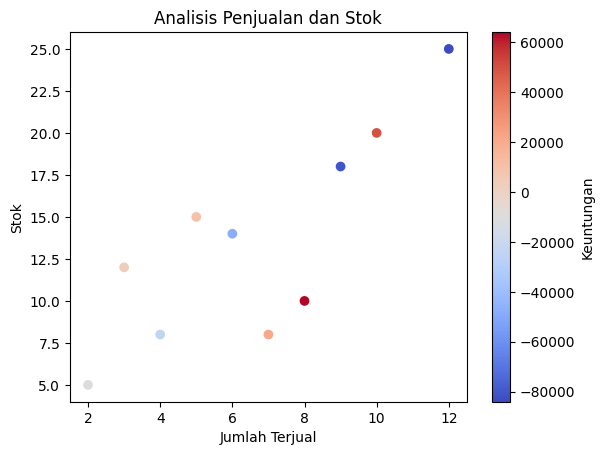

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()